In [8]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [9]:
epochs = mne.read_epochs_eeglab('S1_elist_bins_chop_be.set')
display(epochs.event_id)

Extracting parameters from C:\Users\jowan\erpclass\S1_elist_bins_chop_be.set...
Not setting metadata
256 matching events found


C:\Users\jowan\AppData\Local\Temp\ipykernel_23768\4045412591.py:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  epochs = mne.read_epochs_eeglab('S1_elist_bins_chop_be.set')


No baseline correction applied
0 projection items activated
Ready.


{'B4(222)/205': 1,
 'B1(221)/201': 2,
 'B2(222)/201': 3,
 'B1(221)/202': 4,
 'B3(221)/206': 5,
 'B2(222)/202': 6,
 'B3(221)/205': 7,
 'B4(222)/206': 8}

In [10]:
# '/' indicates hierarchical events: 'B4(222)' corresponds to events_id 1 or 8, i.e., Bin 4 in EEGLAB
epochs['B4(222)']

Number of events,65
Events,B4(222)/205: 33B4(222)/206: 32
Time range,-0.200 – 1.199 s
Baseline,off


In [11]:
# Compute averaged ERPs: an instance of Evoked in MNE
evokeds = [epochs[i].average() for i in ['B1(221)','B2(222)','B3(221)','B4(222)']]
evokeds

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[<Evoked | '0.54 × B1(221)/201 + 0.46 × B1(221)/202' (average, N=63), -0.2 – 1.199 s, baseline off, 32 ch, ~391 kB>,
 <Evoked | '0.48 × B2(222)/201 + 0.52 × B2(222)/202' (average, N=66), -0.2 – 1.199 s, baseline off, 32 ch, ~391 kB>,
 <Evoked | '0.50 × B3(221)/206 + 0.50 × B3(221)/205' (average, N=62), -0.2 – 1.199 s, baseline off, 32 ch, ~391 kB>,
 <Evoked | '0.51 × B4(222)/205 + 0.49 × B4(222)/206' (average, N=65), -0.2 – 1.199 s, baseline off, 32 ch, ~391 kB>]

In [12]:
n_bins = len(evokeds)
n_chs, n_times = evokeds[0].get_data().shape
data = np.array([evokeds[i].get_data(units='uV') for i in range(len(evokeds))], dtype=object).reshape(n_bins, n_chs, n_times)
data.shape

(4, 32, 1400)

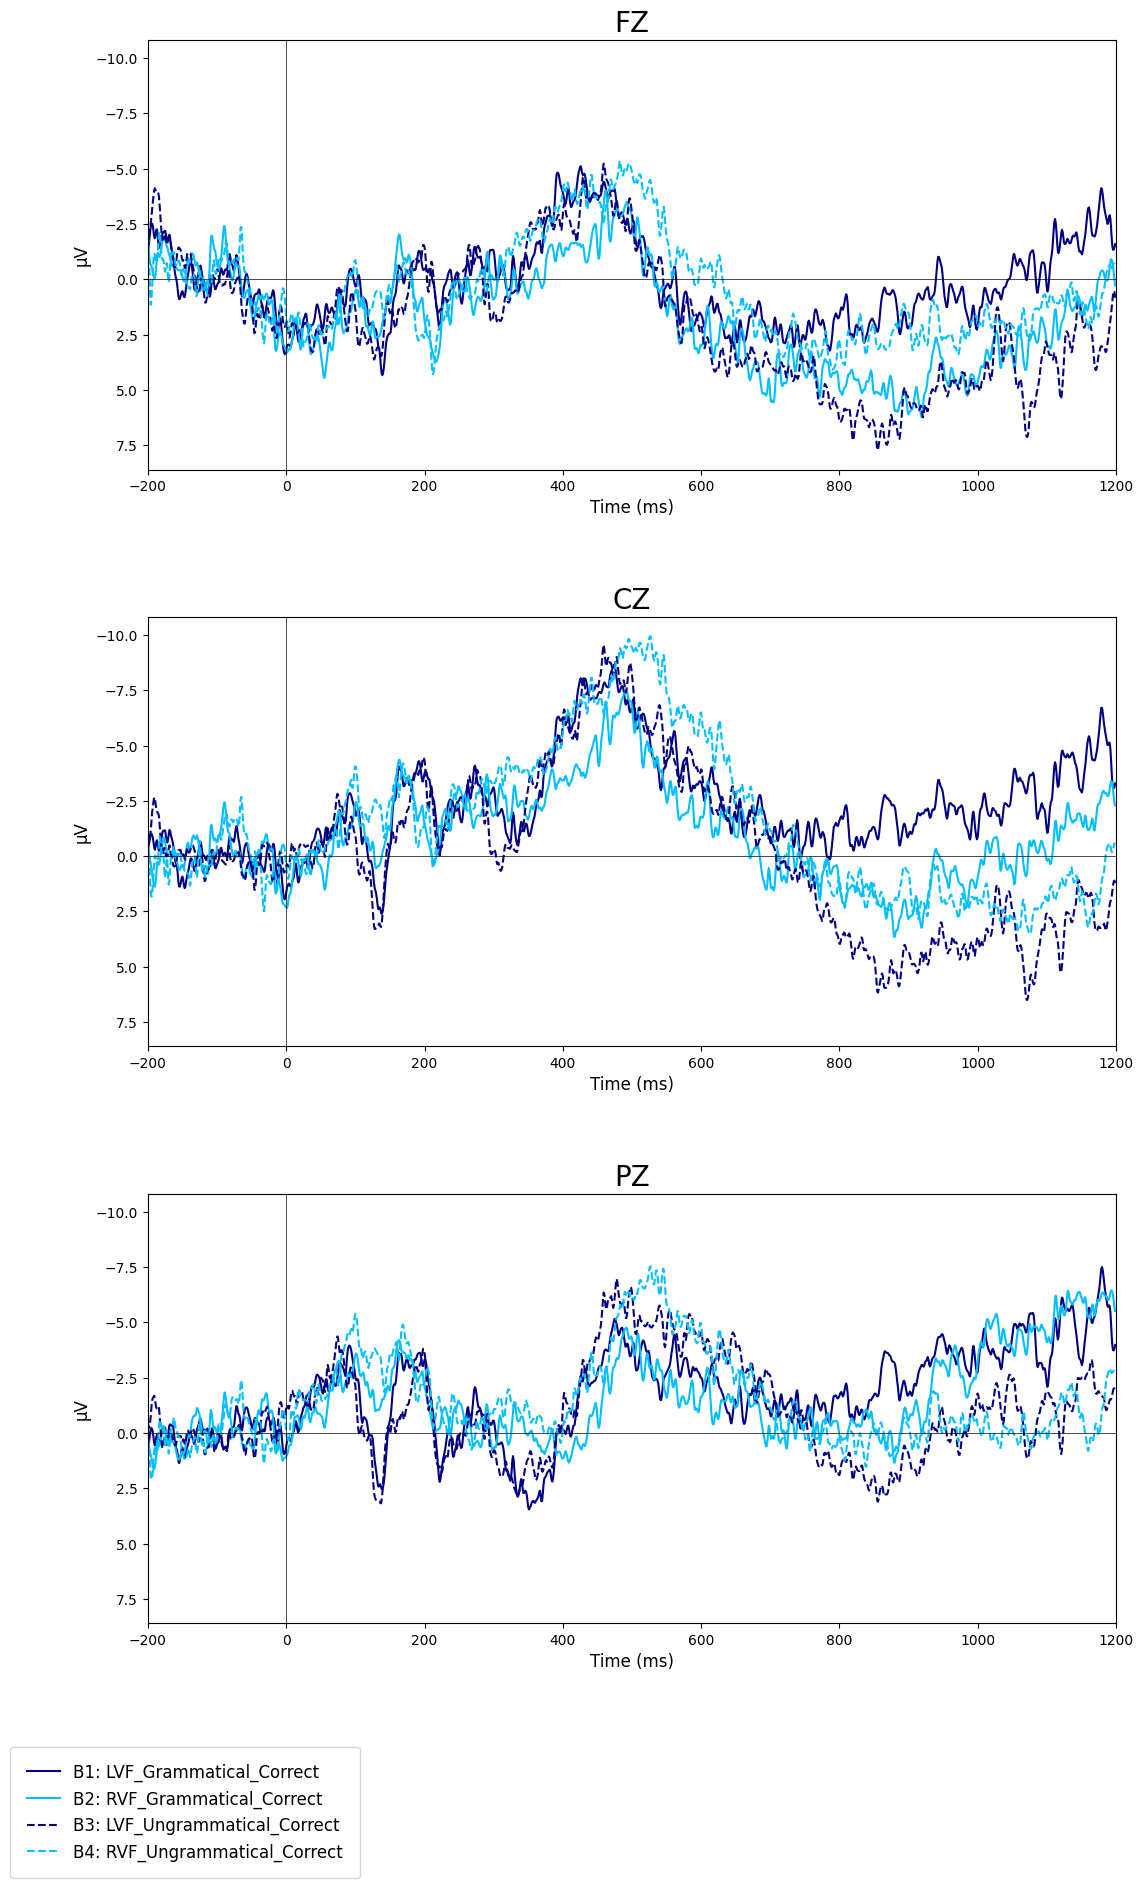

In [17]:
# Creating a dictionary to obtain channel idices through channel labels
ch_dict = {}
for i, x in enumerate(epochs.ch_names):
    ch_dict[x] = i
    
ch_to_plot = ['FZ', 'CZ', 'PZ']

t = [i for i in range(-200, 1200)]
linestyles = ['solid', 'solid', 'dashed', 'dashed']
colors = ['navy','deepskyblue','navy', 'deepskyblue']
bins = ['B1: LVF_Grammatical_Correct',
        'B2: RVF_Grammatical_Correct',
        'B3: LVF_Ungrammatical_Correct',
        'B4: RVF_Ungrammatical_Correct']

figure, axes = plt.subplots(3,1, figsize=(12, 18), sharey=True)
for ax, ch in zip(axes.copy().flatten(), ch_to_plot):
    for i, x in enumerate(bins):
        ax.plot(t, data[bins.index(x)][ch_dict[ch]], linestyle=linestyles[i], color=colors[i], label=x)
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch, fontsize=20)
    ax.set_xlabel('Time (ms)', fontsize=12)
    ax.set_xlim(-200, 1200)
    ax.set_ylabel('µV', fontsize=12)
    ax.invert_yaxis()
    ax.yaxis.set_tick_params(labelbottom=True)
    hdl, lbl = ax.get_legend_handles_labels()
figure.legend(hdl, lbl, loc='upper left', bbox_to_anchor=[-0.001, 0.001], borderpad=1, fontsize=12)
figure.tight_layout(pad=5)
plt.show()